# 19 RNN & LSTM & GRU

In [1]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [14]:
input_size = 28
sequence_length = 28
n_layers = 2
hidden_size = 128
num_classes = 10 
nepochs = 2
batch_size = 100
lr = 0.001

In [15]:
train_dataset = torchvision.datasets.MNIST(root="./data", train=True,
                                           transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root="./data", train=False,
                                           transform=transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size,
                                           shuffle=False)

In [16]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


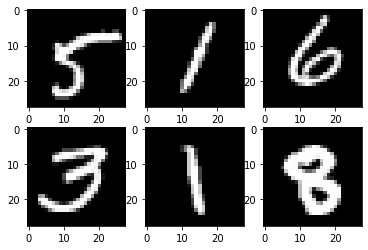

In [17]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

## RNN

In [18]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size 
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        
        
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        out, _ = self.rnn(x, h0)
        out = out[:, -1, :]
        out = self.fc(out)
        return out

In [19]:
model = RNN(input_size, hidden_size, n_layers, num_classes)

In [20]:
criteria = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [21]:
n_total_steps = len(train_loader)

for epoch in range(nepochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, sequence_length, input_size)
        
        pred = model(images)
        loss = criteria(pred, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if i % 100 == 99:
            print(f'epoch {epoch+1} / {nepochs}, step {i+1:4d}/{n_total_steps}, loss {loss.item():.5f}')

epoch 1 / 2, step  100/600, loss 0.97657
epoch 1 / 2, step  200/600, loss 0.57002
epoch 1 / 2, step  300/600, loss 0.58815
epoch 1 / 2, step  400/600, loss 0.36561
epoch 1 / 2, step  500/600, loss 0.32704
epoch 1 / 2, step  600/600, loss 0.44005
epoch 2 / 2, step  100/600, loss 0.22205
epoch 2 / 2, step  200/600, loss 0.16783
epoch 2 / 2, step  300/600, loss 0.14191
epoch 2 / 2, step  400/600, loss 0.18785
epoch 2 / 2, step  500/600, loss 0.15795
epoch 2 / 2, step  600/600, loss 0.11088


In [22]:
with torch.no_grad():
    correct = 0
    samples = 0 
    for images, labels in test_loader:
        images = images.reshape(-1, sequence_length, input_size)
        pred = model(images)
        
        _, predictions = torch.max(pred, 1)
        samples += labels.shape[0]
        correct += (predictions == labels).sum().item()

In [23]:
print(f'Test acurracy: {correct / samples * 100:.2f}%')

Test acurracy: 93.69%


## GRU

In [27]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size 
        self.rnn = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        
        
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        out, _ = self.rnn(x, h0)
        out = out[:, -1, :]
        out = self.fc(out)
        return out
    
model = RNN(input_size, hidden_size, n_layers, num_classes)

criteria = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

n_total_steps = len(train_loader)

for epoch in range(nepochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, sequence_length, input_size)
        
        pred = model(images)
        loss = criteria(pred, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if i % 100 == 99:
            print(f'epoch {epoch+1} / {nepochs}, step {i+1:4d}/{n_total_steps}, loss {loss.item():.5f}')

epoch 1 / 2, step  100/600, loss 0.65089
epoch 1 / 2, step  200/600, loss 0.51852
epoch 1 / 2, step  300/600, loss 0.14302
epoch 1 / 2, step  400/600, loss 0.24724
epoch 1 / 2, step  500/600, loss 0.14750
epoch 1 / 2, step  600/600, loss 0.15972
epoch 2 / 2, step  100/600, loss 0.11752
epoch 2 / 2, step  200/600, loss 0.08276
epoch 2 / 2, step  300/600, loss 0.04663
epoch 2 / 2, step  400/600, loss 0.11340
epoch 2 / 2, step  500/600, loss 0.02573
epoch 2 / 2, step  600/600, loss 0.03570


In [28]:
with torch.no_grad():
    correct = 0
    samples = 0 
    for images, labels in test_loader:
        images = images.reshape(-1, sequence_length, input_size)
        pred = model(images)
        
        _, predictions = torch.max(pred, 1)
        samples += labels.shape[0]
        correct += (predictions == labels).sum().item()

print(f'Test acurracy: {correct / samples * 100:.2f}%')

Test acurracy: 97.80%


## LSTM

In [29]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(RNN, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size 
        self.rnn = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        
        
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
        out, _ = self.rnn(x, (h0, c0))
        out = out[:, -1, :]
        out = self.fc(out)
        return out
    
model = RNN(input_size, hidden_size, n_layers, num_classes)

criteria = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

n_total_steps = len(train_loader)

for epoch in range(nepochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(-1, sequence_length, input_size)
        
        pred = model(images)
        loss = criteria(pred, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if i % 100 == 99:
            print(f'epoch {epoch+1} / {nepochs}, step {i+1:4d}/{n_total_steps}, loss {loss.item():.5f}')

epoch 1 / 2, step  100/600, loss 0.66581
epoch 1 / 2, step  200/600, loss 0.45814
epoch 1 / 2, step  300/600, loss 0.16653
epoch 1 / 2, step  400/600, loss 0.24277
epoch 1 / 2, step  500/600, loss 0.12623
epoch 1 / 2, step  600/600, loss 0.12943
epoch 2 / 2, step  100/600, loss 0.25156
epoch 2 / 2, step  200/600, loss 0.11204
epoch 2 / 2, step  300/600, loss 0.06191
epoch 2 / 2, step  400/600, loss 0.18741
epoch 2 / 2, step  500/600, loss 0.06041
epoch 2 / 2, step  600/600, loss 0.09884


In [30]:
with torch.no_grad():
    correct = 0
    samples = 0 
    for images, labels in test_loader:
        images = images.reshape(-1, sequence_length, input_size)
        pred = model(images)
        
        _, predictions = torch.max(pred, 1)
        samples += labels.shape[0]
        correct += (predictions == labels).sum().item()

print(f'Test acurracy: {correct / samples * 100:.2f}%')

Test acurracy: 94.93%
